In [17]:
# Tabusearch function is saved as .py file
# Import the turn_to_py.py file to do parallel
import turn_to_py 
import random
import datetime
from multiprocessing import Pool
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a list contain 29 different route
# These 29 routes starts from different cities.
city = []
for line in open("tsp.txt"):
    place,lon,lat = line.strip().split(" ")
    city.extend([(place,(lon,lat))])  

city1=city.copy()
city_list=[]
cc=city1.copy()
city_list.append(cc)
i=0
while i < 28:
    city1.append(city1[0])
    city1.remove(city1[0])
    cc=city1.copy()
    city_list.append(cc)
    i=i+1
# ex1 is the route start from city1
ex1=city_list[0]

In [5]:
# Use Multiprocessing
# Record the parallel time
# 'output' contain 29 solutions start from 29 different city.
if __name__ ==  '__main__': 
 s1=datetime.datetime.now()
 num_processors = 3
 p=Pool(processes = num_processors)
 output = p.map(turn_to_py.parallelfunc,city_list)
 s2=datetime.datetime.now()
total_time_parallel=s2-s1
total_time_parallel.total_seconds()

In [28]:
# input: the output contained 29 solutions above.
# Selec the minimum travel distance, and return the start city and route.
# plot a picture to show teh best route.
def finalanswer(output):
    distances=[]
    for i in output:
        distances.append(i[0])
    cc=output[distances.index(min(distances))][1].copy()
    cd=[]
    dd=[]
    for i in range(0,29):
        cd.append(float(cc[i][1][0]))
        dd.append(float(cc[i][1][1]))
    cd.append(float(cc[0][1][0]))
    dd.append(float(cc[0][1][1]))
    # data
    df=pd.DataFrame({'x': cd, 'y': dd })
    
    # plot
    fig,ax=plt.subplots(figsize=(10, 10))
    plt.title('Route with Minimum Distance')
    plt.xlabel(round(output[distances.index(min(distances))][0],3))
    plt.plot( 'x', 'y', data=df, linestyle='-', marker='o')
    plt.grid(True)
    plt.show()
    
    return(distances.index(min(distances))+1,
           output[distances.index(min(distances))][0],
           output[distances.index(min(distances))][1])

C:\Users\13645\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


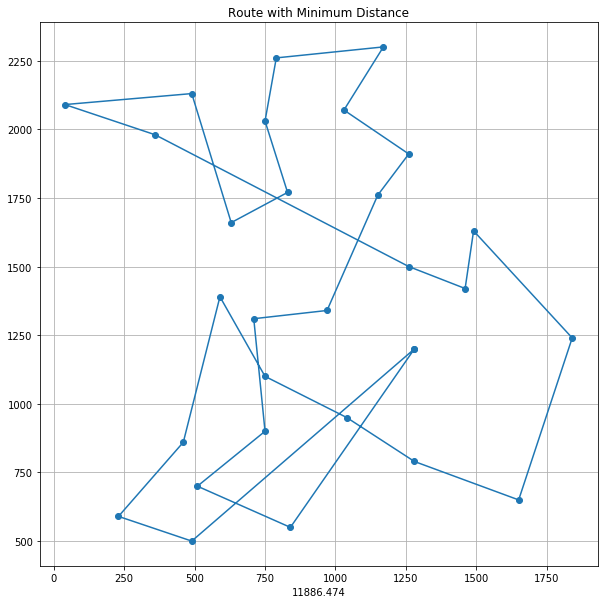

(16,
 11886.474283821795,
 [('16', ('1280.0', '1200.0')),
  ('22', ('490.0', '500.0')),
  ('17', ('230.0', '590.0')),
  ('18', ('460.0', '860.0')),
  ('20', ('590.0', '1390.0')),
  ('4', ('750.0', '1100.0')),
  ('19', ('1040.0', '950.0')),
  ('25', ('1280.0', '790.0')),
  ('7', ('1650.0', '650.0')),
  ('23', ('1840.0', '1240.0')),
  ('8', ('1490.0', '1630.0')),
  ('27', ('1460.0', '1420.0')),
  ('24', ('1260.0', '1500.0')),
  ('29', ('360.0', '1980.0')),
  ('3', ('40.0', '2090.0')),
  ('26', ('490.0', '2130.0')),
  ('2', ('630.0', '1660.0')),
  ('21', ('830.0', '1770.0')),
  ('5', ('750.0', '2030.0')),
  ('9', ('790.0', '2260.0')),
  ('12', ('1170.0', '2300.0')),
  ('6', ('1030.0', '2070.0')),
  ('28', ('1260.0', '1910.0')),
  ('1', ('1150.0', '1760.0')),
  ('13', ('970.0', '1340.0')),
  ('10', ('710.0', '1310.0')),
  ('15', ('750.0', '900.0')),
  ('14', ('510.0', '700.0')),
  ('11', ('840.0', '550.0'))])

In [29]:
answer1=finalanswer(output)
answer1

In [9]:
# Get 10 calculation time when we use 2 processors.
total_time2=[]
for i in range(0,10):
    if __name__ ==  '__main__': 
     s1=datetime.datetime.now()
     num_processors = 2
     p=Pool(processes = num_processors)
     output = p.map(turn_to_py.parallelfunc,city_list)
     s2=datetime.datetime.now()


    total_time_parallel=s2-s1
    total_time2.append(total_time_parallel.total_seconds())

In [10]:
# Get 10 calculation time when we use 2 processors.
total_time3=[]
for i in range(0,10):
    if __name__ ==  '__main__': 
     s1=datetime.datetime.now()
     num_processors = 3
     p=Pool(processes = num_processors)
     output = p.map(turn_to_py.parallelfunc,city_list)
     s2=datetime.datetime.now()


    total_time_parallel=s2-s1
    total_time3.append(total_time_parallel.total_seconds())

In [28]:
# Compare the calculation time under 2 processor and 3.
processors=pd.DataFrame()
processors['2 Processor']=total_time2
processors['3 Processor']=total_time3
processors.describe()
processors.plot(figsize=(10,5))
plt.title('Runing Time of Different Processors')
plt.xlabel('Repeated 10 Times')
plt.ylabel('Used Time')

,2 Processor,3 Processor
0,61.182359,45.420453
1,58.182012,47.609467
2,57.797793,46.985113
3,57.830047,44.913915
4,58.369592,44.576157
5,57.819640,45.087007
6,60.019977,45.192016
7,58.542630,44.779721
8,57.955663,48.541218
9,57.445670,46.966097


In [88]:
# calculate the original time without multiprocess
s3=datetime.datetime.now()
result=[]
for i in city_list:
    result.append(turn_to_py.parallelfunc(i))
    
s4=datetime.datetime.now()  
s4-s3

datetime.timedelta(seconds=89, microseconds=150407)

In [12]:
# The initial route is travel from city 1 to 29.
# Plot the orignial route.
cd1=[]
dd1=[]
for i in range(0,29):
    cd1.append(float(city_list[0][i][1][0]))
    dd1.append(float(city_list[0][i][1][1]))
cd1.append(float(city_list[0][0][1][0]))
dd1.append(float(city_list[0][0][1][1]))
# data
df1=pd.DataFrame({'x': cd1, 'y': dd1 })
fig,ax=plt.subplots(figsize=(10, 10))

plt.title('Route Without Tabu Search')

plt.plot( 'x', 'y', data=df1, linestyle='-', marker='o')
plt.grid(True)

In [36]:
#calculate the average travel distance of intial route:1-2-3-...-29
def calcu_cost(route):
    distance=0
    for i in range(0,28):
        distance+=np.linalg.norm(np.array([float(route[i][1][0]),
                                           float(route[i][1][1])])-
                                 np.array([float(route[i+1][1][0]),
                                           float(route[i+1][1][1])]))
    distance+=np.linalg.norm(np.array([float(route[0][1][0]),
                                       float(route[0][1][1])])-
                             np.array([float(route[28][1][0]),
                                       float(route[28][1][1])]))
    return distance

cc=0
for i in range(0,28):
    cc=cc+calcu_cost(city_list[i])
cc/29

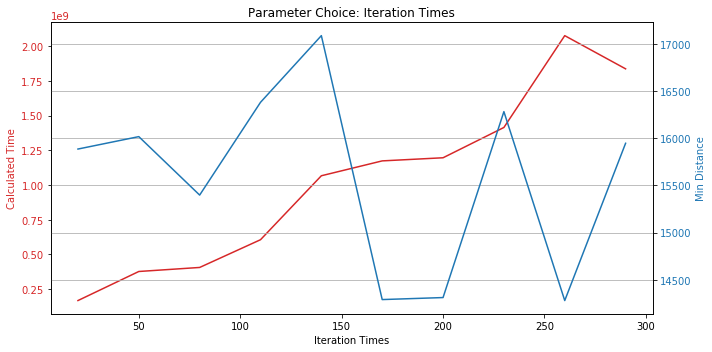

In [11]:
# There are three different parameter we need to determine;
# Parameter Choose: stop_time
# Set a range for consideration iteration time(stop time): [20:300];
# Calculate the optimal solution under each stop_time parameter
# Calculate the total time we use under this stop_time parameter
time_interation_time=[]
distances=[]
for i in range(20,300,10):
    s1=datetime.datetime.now()
    distance=turn_to_py.tabusearch(i,ex1,20,10)[0]
    s2=datetime.datetime.now()
    time_interation_time.append(s2-s1)
    distances.append(distance)
# Recored the two variables;
df=pd.DataFrame()
index_a=[i for i in range(20,300,10)]
df['time']=time_interation_time
df['min_distances']=distances
df.index=index_a
#Plot the two vriables;
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Iteration Times')
ax1.set_ylabel('Calculated Time', color=color)
ax1.plot(index_a, df['time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Min Distance', color=color)  
ax2.plot(index_a, df['min_distances'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Parameter Choice: Iteration Times')
plt.grid(axis='y')
fig.tight_layout()  
plt.show()

In [ ]:
# Parameter Choose: stop_time
# Repeat the above process 10 time, and the best solution in each time.
# Firstly, sort the parameters by travel distance;
# Pick the [0:5] best parameters which lead minimum travel distance;
# Fianlly, choose the one with least calculate time.
list_iteration=[]
for a in range(0,10):
    
    time_interation_time=[]
    distances=[]
    for i in range(20,300,10):
        s1=datetime.datetime.now()
        distance=turn_to_py.tabusearch(i,ex1,100,30)[0]
        s2=datetime.datetime.now()
        time_interation_time.append(s2-s1)
        distances.append(distance)

    df=pd.DataFrame()
    index_a=[i for i in range(20,300,10)]
    df['time']=time_interation_time
    df['min_distances']=distances
    df.index=index_a
    # Sort by travel distance, and pick the one with least calculation time
    list_iteration.append(df.sort_values(by=['min_distances'])[0:5].
                          index.min())

In [ ]:
# Parameter Choose: candidate_t (neibourhood space)
# Set a range for consideration candidate_t: [10:200];
# Calculate the optimal solution under each candidate_t parameter
# Calculate the total time we use under this candidate_t parameter
# Plot the two vriables; 
candidate_t_time=[]
distance_2=[]
for i in range(10,200,10):
    s1=datetime.datetime.now()
    distance=turn_to_py.tabusearch(20,ex1,i,10)[0]
    s2=datetime.datetime.now()
    candidate_t_time.append(s2-s1)
    distance_2.append(distance)
    
df2=pd.DataFrame()
index_b=[i for i in range(10,200,10)]
df2['time']=candidate_t_time
df2['min_distances']=distance_2
df2.index=index_b
#Plot the two vriables;
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Candidate List')
ax1.set_ylabel('Calculated Time', color=color)
ax1.plot(index_b, df2['time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Min Distance', color=color) 
ax2.plot(index_b, df2['min_distances'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Parameter Choice: Candidate List')
plt.grid(axis='y')
fig.tight_layout()  
plt.show()

In [ ]:
# Parameter Choose: candidate_t (neibourhood space)
# Repeat the above process 10 time, and the best solution in each time.
# Firstly, sort the parameters by travel distance;
# Pick the [0:5] best parameters which lead minimum travel distance;
# Fianlly, choose the one with least calculate time.
list_iteration2=[]
for a in range(0,10):
    
    time_interation_time=[]
    distances=[]
    for i in range(10,200,10):
        s1=datetime.datetime.now()
        distance=turn_to_py.tabusearch(20,ex1,i,10)[0]
        s2=datetime.datetime.now()
        time_interation_time.append(s2-s1)
        distances.append(distance)

    df=pd.DataFrame()
    index_a=[i for i in range(10,200,10)]
    df['time']=time_interation_time
    df['min_distances']=distances
    df.index=index_a
    # Sort by travel distance, and pick the one with least calculation time
    list_iteration2.append(df.sort_values(by=['min_distances'])[0:5].
                           index.min())

In [ ]:
# Parameter Choose: tabu_length
# Set a range for consideration tabu_length: [10:100];
# Calculate the optimal solution under each tabu_length parameter
# Calculate the total time we use under this tabu_length parameter
tabu_length=[]
distance_3=[]
for i in range(10,100,10):
    s1=datetime.datetime.now()
    distance=turn_to_py.tabusearch(20,ex1,20,i)[0]
    s2=datetime.datetime.now()
    tabu_length.append(s2-s1)
    distance_3.append(distance)
    
df3=pd.DataFrame()
index_c=[i for i in range(10,100,10)]
df3['tabu_length']=tabu_length
df3['min_distances']=distance_3
df3.index=index_c
# plot
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Tabu List Length')
ax1.set_ylabel('Calculated Time', color=color)
ax1.plot(index_c, df3['tabu_length'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Min Distance', color=color) 
ax2.plot(index_c, df3['min_distances'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Parameter Choice: Tabu List Length')
plt.grid(axis='y')
fig.tight_layout() 
plt.show()

In [18]:
# Parameter Choose: tabu_length
# Repeat the above process 10 time, and the best solution in each time.
# Firstly, sort the parameters by travel distance;
# Pick the [0:5] best parameters which lead minimum travel distance;
# Fianlly, choose the one with least calculate time.
list_iteration3=[]
for a in range(0,10):
    
    time_interation_time=[]
    distances=[]
    for i in range(10,100,10):
        s1=datetime.datetime.now()
        distance=turn_to_py.tabusearch(20,ex1,20,i)[0]
        s2=datetime.datetime.now()
        time_interation_time.append(s2-s1)
        distances.append(distance)

    df=pd.DataFrame()
    index_a=[i for i in range(10,100,10)]
    df['time']=time_interation_time
    df['min_distances']=distances
    df.index=index_a
    # Sort by travel distance, and pick the one with least calculation time
    list_iteration3.append(df.sort_values(by=['min_distances'])[0:5].
                           index.min())

In [ ]:
# Define function to calculate the total travelling distance through 29 cities
def calcu_cost(route):
    distance=0
    # loop through length of cities
    for i in range(0,28):
        # use Euclidean distance to calculate
        distance+=np.linalg.norm(np.array([float(route[i][1][0]),
                                           float(route[i][1][1])])-
                                 np.array([float(route[i+1][1][0]),
                                           float(route[i+1][1][1])]))
    distance+=np.linalg.norm(np.array([float(route[0][1][0]),
                                       float(route[0][1][1])])-
                             np.array([float(route[28][1][0]),
                                       float(route[28][1][1])]))
    return distance

# use calcu_cost function to calculate the distance without any algorithm
distance_list=[]
for i in range(0,28):
    a=calcu_cost(city_list[i])
    distance_list.append(a)
distance_list
print(np.mean(distance_list)) # the average value of distance


# 3 processors running time list
list_time=[45.42,47.61,46.99,44.91,44.58,45.09,45.19,44.78,48.54,46.97] 
# 1 processors running time list (serial)
list_time_s=[95.89,93.83,94.15,90.39,89.92,90.65,90.59,90.70,91.31,90.82]

# create a dataframe for parallel and serial running time
time_df=pd.DataFrame()
time_df['Parallel']=list_time
time_df['Serial']=list_time_s
# plot lines for parallel and serial running time
time_df.plot(figsize=(8,5))
plt.title('Running time for Parallel and Serial Tabusearch')
plt.ylabel('Time (seconds)')
plt.xlabel('Repeat 10 times');

In [19]:
try:   
    !jupyter nbconvert --to python Multiprocess.ipynb

except:
    pass

[NbConvertApp] Converting notebook Multiprocess.ipynb to python
[NbConvertApp] Writing 12745 bytes to Multiprocess.py
